In [1]:
# Pandas for managing datasets
import pandas as pd

In [2]:
# seaborn for plotting and styling
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# read dataset
tips = sns.load_dataset("tips")

In [4]:
# a preview of the data
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
# make a copy of the data to create the graphs of
df = tips.copy()
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [6]:
# create a column to determine tip percentage
df["tip_percentage"] = df["tip"] / df["total_bill"]

<AxesSubplot:xlabel='tip_percentage', ylabel='Count'>

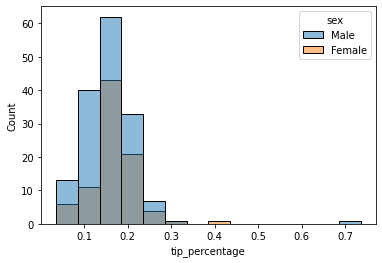

In [7]:
# This plot is a histogram of tip percentages
# The hue argument allows the color to be changed to reflect the categories
sns.histplot(x='tip_percentage', binwidth = 0.05, hue = 'sex', data = df)

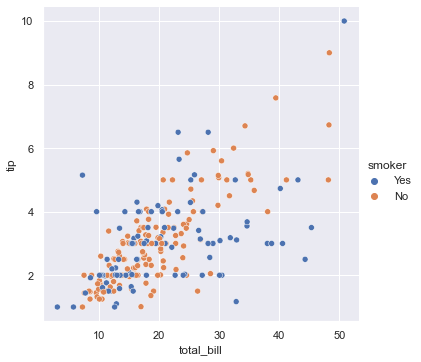

In [8]:
# Scatterplot of total bill and tip
# This shows how you can set the style to change the visual style
# The default relplot is a scatterplot
sns.set(style = 'darkgrid')
sns.relplot( x = 'total_bill', y = 'tip', hue = 'smoker', data = df)

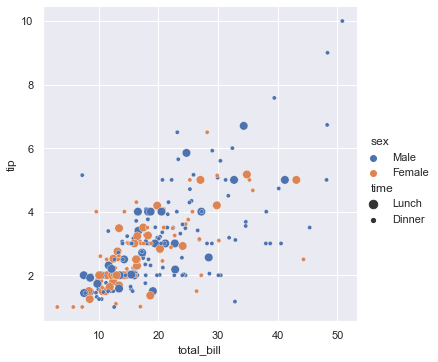

In [9]:
# Scatterplot Gender
# This scatterplot is the same with the addition of the size argument
# The size argument is time here
sns.set(style = 'darkgrid')
gender = sns.relplot( x = 'total_bill', y = 'tip', hue = 'sex', size = 'time', data = df)

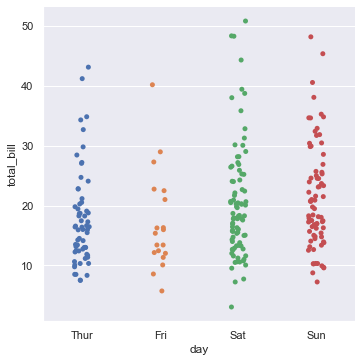

In [10]:
# Catplot is for categorical data
# The default catplot is a strip plot
sns.catplot(x = 'day', y = 'total_bill', data = df)

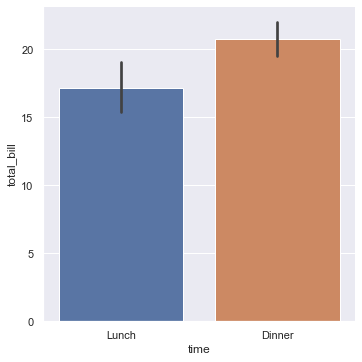

In [11]:
# This catplot shows that with the addition of the kind argument,
# we can alter it to another cat plot, in this case, a barplot
sns.catplot(x = 'time', y = 'total_bill', data= df, kind='bar')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

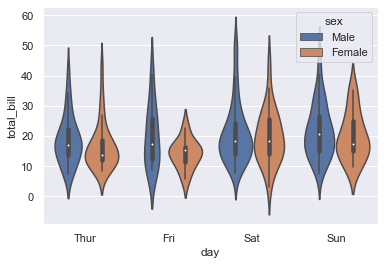

In [12]:
# A violin plot is another way of visualizing categorical data
sns.violinplot(x = 'day', y = 'total_bill', hue = 'sex', data = df)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

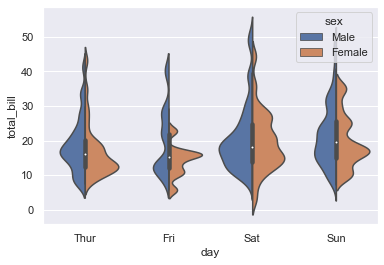

In [13]:
# This violoin plot shows the same data above
# With different arguments, different visuals are created
# Here we set bw to 0.25 and split to True
sns.violinplot(x = 'day', y = 'total_bill', hue = 'sex', bw = .25, split = True, data = df)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

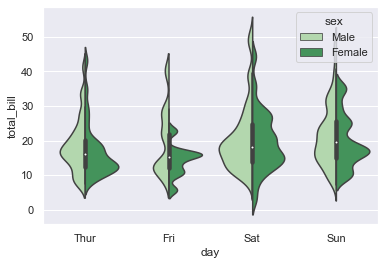

In [14]:
# This shows how we can alter the color palette of a violin plot
sns.violinplot(x = 'day', y = 'total_bill', hue = 'sex', bw = .25, split = True, palette = 'Greens', data = df)

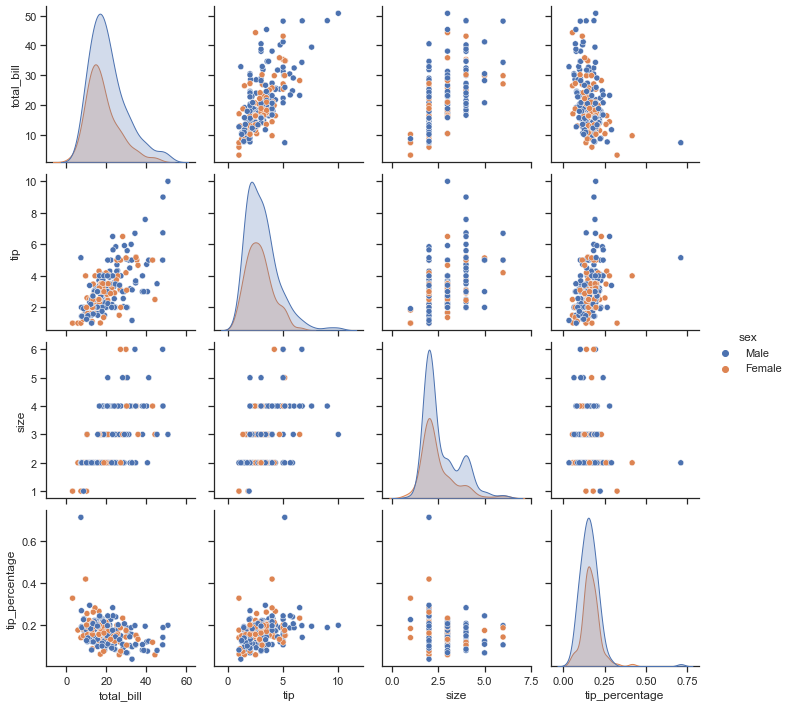

In [15]:
# Pairplots allow visualization of many distributions at once
# Seaborn determines the visualizations and the variables to create
# This allows the user to quickly view distributions very easily
sns.set_theme(style="ticks")
sns.pairplot(df, hue='sex')

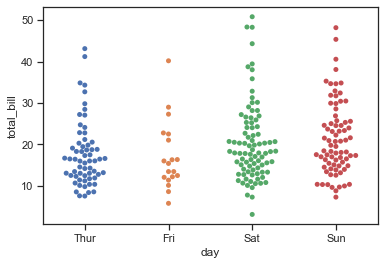

In [16]:
# This swarm plot is similar to a strip plot but does not allow points to overlap
# The style is whitegrid
sns.swarmplot(y='total_bill', x = 'day', data = df)
sns.set_style('whitegrid')

<AxesSubplot:>

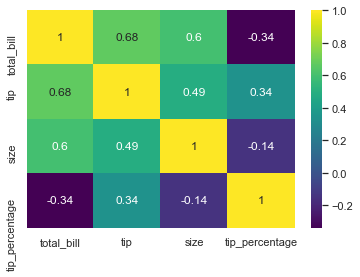

In [17]:
# Seaborn can also create heatmaps
# This heatmap shows correlation between variables
sns.heatmap(df.corr(), annot = True, cmap = 'viridis')

<AxesSubplot:xlabel='size', ylabel='day'>

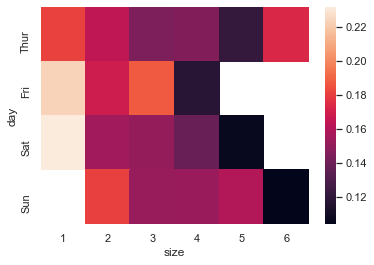

In [18]:
# This heatmap requires creation of a pivot table
# This shows that Seaborn can work with pivot tables
pivot = df.pivot_table(index = ['day'], columns =['size'], values = 'tip_percentage', aggfunc = np.average)
sns.heatmap(pivot)

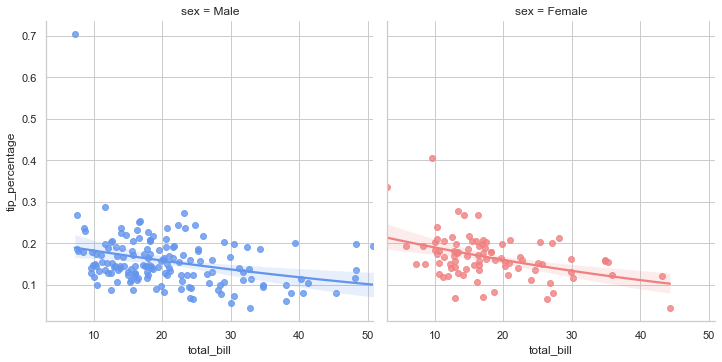

In [26]:
# This plot shows Seaborn's ability to create side by side visuals
# The col argument allows for this
pal = dict(Male='#6495ED', Female = '#F08080')
g = sns.lmplot(x='total_bill', y = 'tip_percentage', col = 'sex', hue='sex', data =df,
             palette=pal, y_jitter=.02, logistic = True, truncate = True)

<AxesSubplot:xlabel='tip', ylabel='day'>

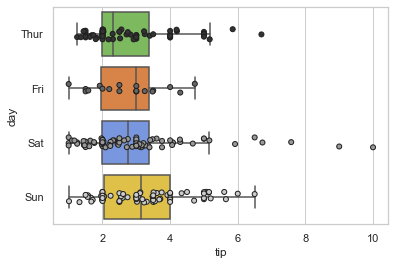

In [28]:
# This plot is an example of how you can overlay visualizations
# This is a boxplot with a stripplot on top
sns.stripplot(x='tip', y = 'day', data = df, jitter = True, dodge = True, linewidth=1, 
              edgecolor = 'gray', palette = 'gray')
colors = ['#78C850', '#F08030', '#6890F0','#F8D030']
sns.boxplot(x='tip', y='day',data = df, fliersize=0, palette = colors)
